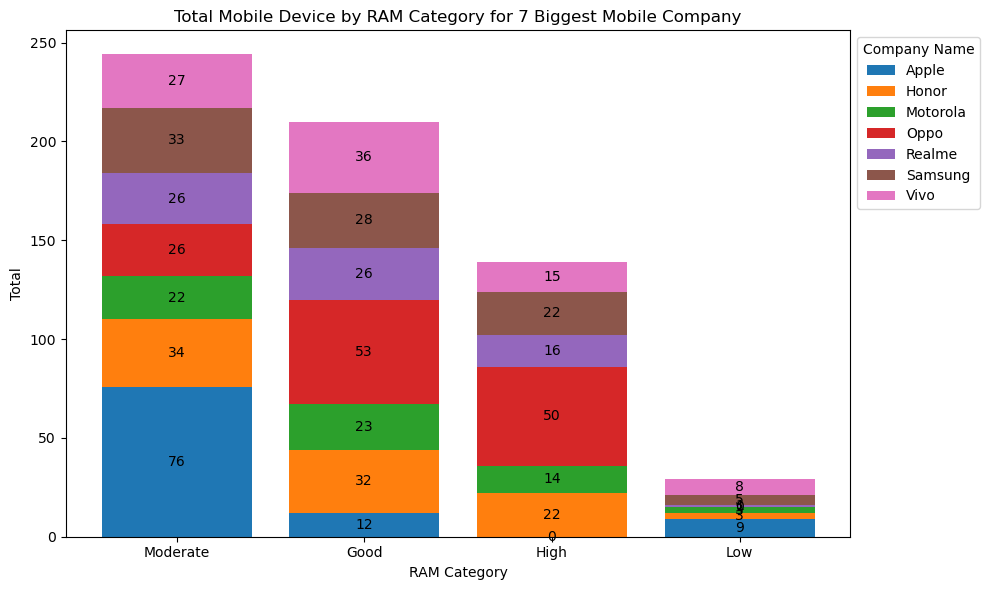

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Total Mobile Device by RAM Category for 7 Biggest Mobile Company
# Dataset
df = pd.read_csv("Mobiles Dataset (2025).csv", encoding="ISO-8859-1")

# Clean RAM Column
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '', regex=False)
df = df[df['RAM'].notna()]
df = df.assign(RAM=df['RAM'].str.split('/')).explode('RAM')
df['RAM'] = df['RAM'].str.strip().astype(float)

# Convert to integer
df['RAM'] = df['RAM'].astype(int)
# Create RAM categories
df['RAM Category'] = pd.cut(
    df['RAM'],
    bins=[0, 3, 6, 8, 16],
    labels=['Low', 'Moderate', 'Good', 'High']
)

# Only top 7 most appear company
top_companies = df['Company Name'].value_counts().nlargest(7).index
df = df[df['Company Name'].isin(top_companies)]

# Plot each group_col as stack
context_group_counts = df.groupby(['RAM Category', 'Company Name'], observed=False).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='RAM Category', columns='Company Name', values='Count').fillna(0)

# Sortin
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

for group_col_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
    bottom += counts[:, group_col_index]
    ax.bar_label(p, label_type='center', fmt='%d')
    
# Bar Chart
ax.set_title('Total Mobile Device by RAM Category for 7 Biggest Mobile Company')
ax.set_xlabel('RAM Category')
ax.set_ylabel('Total')
ax.legend(title='Company Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()